# CONTENT

In this notebooks there are some early experimetn with custom implemetnation of an optimizer and the use of a greedy approach for the optimizaiton (that didn'g give rigor

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

We suppose we have our matrix design for matrix M, that we can always keep the same for every screening

In [ ]:
M = np.array([[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0], [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1], [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0], [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1], [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]])

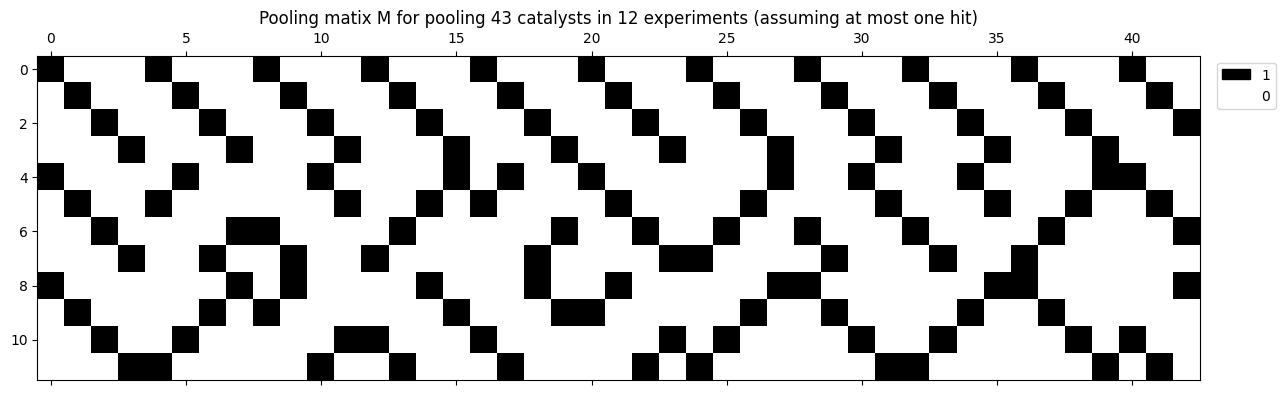

In [ ]:
# Plot the data with a specified size
fig, ax = plt.subplots(figsize=(15, 8))
cax = ax.matshow(M, cmap='gray_r')

# Create a custom legend
import matplotlib.patches as mpatches
black_patch = mpatches.Patch(color='black', label='1')
white_patch = mpatches.Patch(color='white', label='0')

# Place the legend outside the plot
ax.legend(handles=[black_patch, white_patch], loc='upper center', bbox_to_anchor=(1.04, 1))
plt.title(f"Pooling matix M for pooling {M.shape[1]} catalysts in {M.shape[0]} experiments (assuming at most one hit)")
plt.show()

This design would be able to correctly identify one true hit without further optimization, but if there are more than two real hits a step of compressed sensing will be needed

In [ ]:
###### SIMULATION WITH SYNTHETIC DATA ########

#Insert here the hitters (their indexes as a int) and the perc yeald that they
#will prodcue (their numerical value as float in [0,100]) in the following dict
true_hitters = {15:42.0, 30:0.5, 12:15, 7:0.01}

def generate_y_and_true_x(true_hitters, M):
  """
  Function that generates result vector y from list of hitters and their values
  """
  true_x = np.zeros(M.shape[1])
  for key, value in true_hitters.items():
    true_x[key] = value

  y = M @ true_x
  return y, true_x

y, true_x = generate_y_and_true_x(true_hitters, M)

np.set_printoptions(suppress=True)
print("y vector is: ", y, "\n")
print("True x vector to recover is: ", true_x)
np.set_printoptions(suppress=False)

y vector is:  [15.    0.    0.5  42.01 42.5   0.    0.01 15.    0.01 42.   15.5   0.  ] 

True x vector to recover is:  [ 0.    0.    0.    0.    0.    0.    0.    0.01  0.    0.    0.    0.
 15.    0.    0.   42.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.5   0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.  ]


In [ ]:
def Continuous_Noisy_COMP(M, y, tol_per_exp = 0.5):
  """
  COMP decoding algoruthm to eliminate the true negative (non hitters) and the
  surely positive elements (real hitters). If a catalyst appears in all the
  experiments/pools that returned a signigicantly high value of hit percentage,
  then it will be classified as potentially positive and whatever is not
  potentially positive is surely negative

  The tol_per_exp paramter is used to set the tollerance of side product that we
  allow for each experiment (i.e. some catalysts might produce a very small amunt
  of yeald, but it is too few to be desirable)

  """
  prob_hitters = {}
  true_positives = {}

  #Corrects for some noise. 11 is the number of catalysts in each pool
  y[y < (11 * tol_per_exp)] = 0

  #Look at the experiment where nothing happened
  no_hit_exper = [i for i in range(len(y)) if y[i] == 0]

  #In those experiment all the catalysts that were in that pool are true negatives
  true_negatives = set([j for i in no_hit_exper for j in range(M.shape[1]) if M[i,j] != 0 ])

  #Everything else is a possible hit
  possible_hits = set([i for i in range(M.shape[1])]).difference(true_negatives)

  return true_negatives, possible_hits

In [ ]:
true_negatives, possible_hits = Continuous_Noisy_COMP(M, y)
true_negatives, possible_hits

({0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  13,
  14,
  16,
  17,
  18,
  19,
  21,
  22,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  41,
  42},
 {12, 15, 20, 23, 40})

In [ ]:
def get_y_prime_and_M_prime(possible_hits, M, y):

  hitter_exper = [i for i in range(len(y)) if y[i] != 0]

  y_prime = y[hitter_exper]
  M_prime = M[hitter_exper,:][:,list(possible_hits)]

  return y_prime, M_prime

In [ ]:
y_prime, M_prime = get_y_prime_and_M_prime(possible_hits, M, y)
y_prime, M_prime

(array([15.  , 42.01, 42.5 , 15.  , 42.  , 15.5 ]),
 array([[1, 1, 0, 1, 0],
        [0, 0, 1, 0, 1],
        [1, 0, 1, 1, 0],
        [0, 1, 0, 0, 1],
        [0, 0, 1, 1, 0],
        [1, 1, 0, 0, 1]]))

In [ ]:
y_prime.shape, M_prime.shape

((6,), (6, 5))

------
Check for matrix obtained and go for linear solver if you have enough informaiton

In [ ]:
x_prime, residuals, rank, s = np.linalg.lstsq(M_prime, y_prime, rcond=None)
x_prime, residuals, rank, s

(array([ 0.5       ,  0.58166667, 27.83666667, 14.08166667, 14.33666667]),
 array([], dtype=float64),
 4,
 array([2.81101398e+00, 2.00000000e+00, 1.57726139e+00, 7.81311012e-01,
        1.74353117e-16]))

-----
## GPSR BB Optimizer



In [ ]:
def Nabla_F(z, tau, B):
  """
  Helper function that calculates the first derivative of the function
  $$ F(z) = c^T z + \frac{1}{2} z^T B z $$
  where $B = M^T M$ and $c = \tau - M^T y$

  Args:
    z (numpy.ndarray): Input vector.
  Returns:
    numpy.ndarray: First derivative of the function.
  """
  c = tau * np.ones_like(B.shape[0]) - M_prime.T @ y_prime
  return  c + B @ z


In [ ]:
def mid(x, y, z):
  """
  Helper function that returns the middle value of the three input values.

  Args:
    x (float): First input value.
    y (float): Second input value.
    z (float): Third input value.
  Returns:
    float: Middle value.
  """
  if x > y:
    if y > z:
      return y
    elif x > z:
      return z
    else:
      return x
  else:
    if x > z:
      return x
    elif y > z:
      return z
    else:
      return y


In [ ]:
#example of usage
mid(3, 4, 2)

3

In [ ]:
def proj(z):
  """
  Helper function that projects the input vector onto the positive orthant
  of the Euclidean space.

  Args:
    z (numpy.ndarray): Input vector.
  Returns:
    numpy.ndarray: Projected vector.
  """
  return np.array([z[i] if z[i] >= 0 else 0 for i in range(len(z))])

#example of usage
proj(np.array([-1, 0, 1]))

array([0, 0, 1])

In [ ]:
def check_termination(z, optimizer_status, tollerance):
  """
  Helper function that checks the termination of the algoritm by looking at the
  relative decrease of sparsity in the solution from one iteration to the following one
  """

  z_old = z[-2]
  z_new = z[-1]

  tau_old = set([i for i in range(len(z_old)) if z_old[i] != 0])
  tau = set([i for i in range(len(z_new)) if z_new[i] != 0])

  condit = len((tau_old | tau) - (tau_old & tau))/len(tau)
  print("Condition val" , condit)

  if condit <= tollerance:
    print("Termination condition reached")
    optimizer_status = 0
  else:
    print("Termination condition not reached yet")

  return optimizer_status

# Example of usage
z = [np.array([1, 1, 0, 0, 0, 1]), np.array([1, 0, 0, 0, 0, 0])]
optimizer_status = 1
tollerance = 0.5

optimizer_status = check_termination(z, optimizer_status, tollerance)
print(f"Optimizer status after checking termination: {optimizer_status}")


Condition val 2.0
Termination condition not reached yet
Optimizer status after checking termination: 1


In [ ]:
def check_termination_2(z, optimizer_status, tollerance, verbose = False):
  """
  Helper function that checks the termination of the algoritm by looking at an upper bound that exists between the value of the funcitona the true solution  F(z*) and the value of the funciton found at this step of the algorithm. This reuslt comes form duality theory
  """
  tau = 0.1 * np.linalg.norm(M_prime.T @ y_prime, np.inf)

  s = tau * ((M_prime @ z[-1] - y_prime)/
             (np.linalg.norm(M_prime.T @ (M_prime @ z[-1] - y_prime), np.inf)))
  if verbose:
    print("s", s)

  condit = 0.5 * np.linalg.norm( y_prime - M_prime @ z[-1], 2) + tau * np.linalg.norm(z[-1], 1) + 0.5 * s.T @ s + y_prime.T @ s
  if verbose:
    print("Condition val" , condit)

  if condit <= tollerance:
    print("Termination condition reached")
    optimizer_status = 0
  else:
    print("Termination condition not reached yet")

  return optimizer_status

#Example usage
z = [np.array([ 0.5       ,  0.58166667, 27.83666667, 14.08166667, 14.33666667])]

optimizer_status = 1
tollerance = 0.5

optimizer_status = check_termination_2(z, optimizer_status, tollerance, verbose=True)
print(f"Optimizer status after checking termination: {optimizer_status}")

s [ 1.03316459e+08  1.03316459e+08 -5.16582232e+07 -5.16582232e+07
 -5.16582232e+07 -5.16582232e+07]
Condition val 1.6011434681355528e+16
Termination condition not reached yet
Optimizer status after checking termination: 1


In [ ]:
def GPSR_BB(M_prime, y_prime, tau_prefactor=0.1, a_min = 0, a_max = 1, tau = 0.5, tollerance = 0.01, iter_limit = 10000, warm_start = True, termination = "Solution Proximity"):

  B = M_prime.T @ M_prime

  tau = tau_prefactor * np.linalg.norm(M_prime.T @ y_prime, np.inf)

  #initial value z_0
  z = []
  if warm_start:
    z_0, residuals, rank, s = np.linalg.lstsq(M_prime, y_prime, rcond=None)
    print("Rank of the matrix M_prime", rank)
    z.append(z_0)
  else:
    z.append(np.ones(M_prime.shape[0]))

  #initial value a_0
  a = 0.5

  #status: 1 = optimization needed
  #status: 0 = optimization finished
  optimizer_status = 1
  iteration = 0

  while optimizer_status == 1:

    #keeping track of iteration and brake if
    #maximum num of iterationreached
    iteration += 1
    if iteration % 1000 == 0:
      print("Iteration: ", iteration)
    if iteration > iter_limit:
      print("Maximum number of iterations reached")
      break

    z_k = z[-1]
    Nabla_F_k = Nabla_F(z_k, tau, B)
    print("Nabla_F_k", Nabla_F_k)

    delta_k = proj(z_k - a * Nabla_F_k) - z_k
    print("delta_k", delta_k)

    if delta_k.T @ B @ delta_k == 0 :
      a = a_max
      z.append(z_k + delta_k)
    else:
      print("delta_k.T @ Nabla_F_k", delta_k.T @ Nabla_F_k)
      print("delta_k.T @ B @ delta_k", delta_k.T @ B @ delta_k)
      lamb = mid(0, (delta_k.T @ Nabla_F_k) / (delta_k.T @ B @ delta_k) ,1)
      print("lamb chosen:", lamb)
      z.append( z_k + lamb * delta_k )
      a = mid(0, (delta_k.T @ delta_k) / (delta_k.T @ B @ delta_k) ,1)
      print("\n")

    if termination == "Solution Proximity":
      if check_termination_2(z, optimizer_status, tollerance) == 0:
        break
    elif termination == "Sparsity":
      if check_termination(z, optimizer_status, tollerance) == 0:
        break
    else:
      raise ValueError("Invalid termination parameter")

  return z, z[-1]

In [ ]:
list_of_solutions, final_solution = GPSR_BB(M_prime, y_prime, tau_prefactor = 0.1)

Streaming output truncated to the last 5000 lines.
lamb chosen: 0


Termination condition not reached yet
Nabla_F_k [12.651 12.651 12.651 12.651 12.651]
delta_k [-0.5        -0.58166667 -2.05347138 -2.05347138 -2.05347138]
delta_k.T @ Nabla_F_k -91.61956414937319
delta_k.T @ B @ delta_k 81.56001268288774
lamb chosen: 0


Termination condition not reached yet
Nabla_F_k [12.651 12.651 12.651 12.651 12.651]
delta_k [-0.5        -0.58166667 -2.05347138 -2.05347138 -2.05347138]
delta_k.T @ Nabla_F_k -91.61956414937319
delta_k.T @ B @ delta_k 81.56001268288774
lamb chosen: 0


Termination condition not reached yet
Nabla_F_k [12.651 12.651 12.651 12.651 12.651]
delta_k [-0.5        -0.58166667 -2.05347138 -2.05347138 -2.05347138]
delta_k.T @ Nabla_F_k -91.61956414937319
delta_k.T @ B @ delta_k 81.56001268288774
lamb chosen: 0


Termination condition not reached yet
Nabla_F_k [12.651 12.651 12.651 12.651 12.651]
delta_k [-0.5        -0.58166667 -2.05347138 -2.05347138 -2.05347138]
delta_k.T @ 

KeyboardInterrupt: 

In [ ]:
list_of_solutions

NameError: name 'list_of_solutions' is not defined

----
Using other people's solver

In [ ]:
!pip install spgl1

In [ ]:
import spgl1

tau =  30
x, r, g, info = spgl1.spgl1(M_prime, y_prime, tau, verbosity=0)

x, r, g, info

(array([4.97332980e-01, 6.05276709e-04, 2.72538477e+01, 9.97535181e-01,
        1.25067887e+00]),
 array([13.50452656, 13.50547344, 13.75128415, 13.74871585, 13.74861713,
        13.75138287]),
 array([-41.00719358, -41.00462528, -41.00537472, -41.00442785,
        -41.00557215]),
 {'tau': 30,
  'rnorm': 33.481637617820084,
  'rgap': 9.698181629261938e-05,
  'gnorm': 41.007193581462985,
  'stat': 4,
  'niters': 22,
  'nprodA': 23,
  'nprodAt': 23,
  'n_newton': 0,
  'time_project': 0.00237274169921875,
  'time_matprod': 0.0007939338684082031,
  'niters_lsqr': 0,
  'time_total': 0.007481575012207031,
  'xnorm1': array([ 0.        , 14.62971409, 30.        , 30.        , 30.        ,
         30.        , 30.        , 30.        , 30.        , 30.        ,
         30.        , 30.        , 30.        , 30.        , 30.        ,
         30.        , 30.        , 30.        , 30.        , 30.        ,
         30.        , 30.        ]),
  'rnorm2': array([77.62306423, 60.51354341, 38.30

In [ ]:
x

array([4.97332980e-01, 6.05276709e-04, 2.72538477e+01, 9.97535181e-01,
       1.25067887e+00])

In [ ]:
poss_output = np.array([4.97332980e-01, 6.05276709e-04, 2.72538477e+01, 9.97535181e-01,
       1.25067887e+00])

In [ ]:
poss_hits = set([21, 14, 12, 32, 40 ])
poss_hits, list(poss_hits)

({12, 14, 21, 32, 40}, [32, 40, 12, 14, 21])

In [ ]:
poss_output = np.round(poss_output, 2)
poss_output

array([ 0.5 ,  0.  , 27.25,  1.  ,  1.25])

In [ ]:
# prompt: I want a set that has the elements of poss_hits that correspond to those elmements in poss_output with a value < 0.1

almost_zero_hits = set([sorted(list(poss_hits))[i] for i in range(len(poss_output)) if poss_output[i] >= 0.1])
almost_zero_hits


{12, 21, 32, 40}

-------
We now try directly with the hard search because in the worst case scenario you should do $2^{12}=4096$ operations that are really cheap on any machine. This approach is in any case done by the step 3 and 4 of the P-Best algorithm

In [ ]:
possible_hits

{12, 15, 20, 23, 40}

In [ ]:
import itertools

power_set = list(map(set, itertools.chain.from_iterable(itertools.combinations(possible_hits, r) for r in range(len(possible_hits)+1))))

print(power_set)

[set(), {40}, {12}, {15}, {20}, {23}, {40, 12}, {40, 15}, {40, 20}, {40, 23}, {12, 15}, {12, 20}, {12, 23}, {20, 15}, {23, 15}, {20, 23}, {40, 12, 15}, {40, 12, 20}, {40, 12, 23}, {40, 20, 15}, {40, 23, 15}, {40, 20, 23}, {12, 20, 15}, {12, 23, 15}, {12, 20, 23}, {20, 23, 15}, {40, 12, 20, 15}, {40, 12, 23, 15}, {40, 12, 20, 23}, {40, 20, 23, 15}, {23, 12, 20, 15}, {40, 12, 15, 20, 23}]


In [ ]:
testing_vectrs = {}
for subset in power_set:
  vec = np.zeros(M.shape[1])
  for i in subset:
    vec[i] = 1
  testing_vectrs[tuple(subset)] = vec

testing_vectrs

{(): array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 (40,): array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 (12,): array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 (15,): array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 (20,): array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 

In [ ]:
len(testing_vectrs)

32

In [ ]:
def binarize(vector):
  """
  Helper function that given a vector returns a binary vector of the same lenght
  that has 1 if the input vector has a value different than 0 and 0 otherwise
  """
  return np.array([1 if vector[i] != 0 else 0 for i in range(len(vector))])



In [ ]:
scores = {}
for key, vector in testing_vectrs.items():
  scores[key] = np.sum(np.abs(binarize(M @ vector) - binarize(y)))

In [ ]:
scores

{(): 6,
 (40,): 3,
 (12,): 3,
 (15,): 3,
 (20,): 3,
 (23,): 3,
 (40, 12): 2,
 (40, 15): 1,
 (40, 20): 2,
 (40, 23): 1,
 (12, 15): 0,
 (12, 20): 1,
 (12, 23): 2,
 (20, 15): 2,
 (23, 15): 1,
 (20, 23): 0,
 (40, 12, 15): 0,
 (40, 12, 20): 1,
 (40, 12, 23): 1,
 (40, 20, 15): 1,
 (40, 23, 15): 0,
 (40, 20, 23): 0,
 (12, 20, 15): 0,
 (12, 23, 15): 0,
 (12, 20, 23): 0,
 (20, 23, 15): 0,
 (40, 12, 20, 15): 0,
 (40, 12, 23, 15): 0,
 (40, 12, 20, 23): 0,
 (40, 20, 23, 15): 0,
 (23, 12, 20, 15): 0,
 (40, 12, 15, 20, 23): 0}

In [ ]:
# prompt: of the dict of dicts "score" described above i want to sort according to the value

sorted_scores = {k: v for k, v in sorted(scores.items(), key=lambda item: item[1])}


In [ ]:
sorted_scores

{(12, 15): 0,
 (20, 23): 0,
 (40, 12, 15): 0,
 (40, 23, 15): 0,
 (40, 20, 23): 0,
 (12, 20, 15): 0,
 (12, 23, 15): 0,
 (12, 20, 23): 0,
 (20, 23, 15): 0,
 (40, 12, 20, 15): 0,
 (40, 12, 23, 15): 0,
 (40, 12, 20, 23): 0,
 (40, 20, 23, 15): 0,
 (23, 12, 20, 15): 0,
 (40, 12, 15, 20, 23): 0,
 (40, 15): 1,
 (40, 23): 1,
 (12, 20): 1,
 (23, 15): 1,
 (40, 12, 20): 1,
 (40, 12, 23): 1,
 (40, 20, 15): 1,
 (40, 12): 2,
 (40, 20): 2,
 (12, 23): 2,
 (20, 15): 2,
 (40,): 3,
 (12,): 3,
 (15,): 3,
 (20,): 3,
 (23,): 3,
 (): 6}

In [ ]:
min_len = len(list(sorted_scores.items())[0][0])
min_score = list(sorted_scores.values())[0]


In [ ]:
final_candidates = []
for key, value in sorted_scores.items():
  if (len(key) == min_len and value == min_score):
    final_candidates.append(key)

In [ ]:
[key for key, value in sorted_scores.items() if (len(key) == min_len and value == min_score)]

[(12, 15), (20, 23)]

In [ ]:
final_candidates

[[12, 15], [20, 23]]

Indeed it recognizes the true hitters (12 and 15), just possibility to confound them with (20,23) which are put in permutations of the indices of 12 and 15

In [ ]:
M_prime_prime = M_prime[:,:-1]

In [ ]:
tau =  80
x, r, g, info = spgl1.spgl1(M_prime_prime, y_prime, tau, verbosity=0)
x

array([ 0.49999938, 14.91833321, 42.17333326, -0.25499965])

In [ ]:
x_prime_1, residuals_1, rank_1, s_1 = np.linalg.lstsq(M_prime_prime[:,:2], y_prime, rcond=None)
x_prime_2, residuals_2, rank_2, s_2 = np.linalg.lstsq(M_prime_prime[:,2:], y_prime, rcond=None)

x_prime_1, x_prime_2

(array([25.6, -1.9]), array([36.106,  9.096]))

In [ ]:
from scipy.optimize import lsq_linear

bounds = (0, np.inf)

result = lsq_linear(M[:,[12,15]], y, bounds=bounds)

result.x

array([15.16666667, 42.17      ])

In [ ]:
result_2 = lsq_linear(M[:,[20,23]], y, bounds=bounds)

result_2.x

array([33.16666667, 24.17      ])

In [ ]:
result

       message: The unconstrained solution is optimal.
       success: True
        status: 3
           fun: [ 1.667e-01  0.000e+00  0.000e+00  1.600e-01 -3.300e-01
                  0.000e+00  0.000e+00  1.667e-01  0.000e+00  1.700e-01
                 -3.333e-01  0.000e+00]
             x: [ 1.517e+01  4.217e+01]
           nit: 0
          cost: 0.16503333333333364
    optimality: 4.973799150320701e-14
   active_mask: [ 0.000e+00  0.000e+00]
 unbounded_sol: (array([ 1.517e+01,  4.217e+01]), array([ 3.301e-01]), 2, array([ 1.732e+00,  1.732e+00]))

In [ ]:
result_2

       message: The unconstrained solution is optimal.
       success: True
        status: 3
           fun: [ 1.817e+01  0.000e+00  0.000e+00 -1.784e+01 -9.333e+00
                  0.000e+00  0.000e+00  9.170e+00  0.000e+00 -8.833e+00
                  8.670e+00  0.000e+00]
             x: [ 3.317e+01  2.417e+01]
           nit: 0
          cost: 486.3450333333333
    optimality: 1.7763568394002505e-14
   active_mask: [ 0.000e+00  0.000e+00]
 unbounded_sol: (array([ 3.317e+01,  2.417e+01]), array([ 9.727e+02]), 2, array([ 1.732e+00,  1.732e+00]))

In [ ]:
result_dict = {}

for element in final_candidates:
  result = lsq_linear(M[:,list(element)], y, bounds=bounds)
  result_dict[element] = [result.x, result.cost]

In [ ]:
result_dict

{(12, 15): [array([15.16666667, 42.17      ]), 0.16503333333333364],
 (20, 23): [array([33.16666667, 24.17      ]), 486.3450333333333]}

In [ ]:
# prompt: Now I want to retrieve the key and item correspoding to the smaller cost in result_dict

min_cost = min(result_dict.values(), key=lambda x: x[1])
min_key = list(result_dict.keys())[list(result_dict.values()).index(min_cost)]


print(f"Catalysts that minizmize: {min_key}")
print(f"Optimal yealds: {result_dict[min_key][0]}")
print(f"Optimal cost: {result_dict[min_key][1]}")


Catalysts that minizmize: (12, 15)
Optimal yealds: [15.16666667 42.17      ]
Optimal cost: 0.16503333333333364


-----
Now we try to trim a design matrix of 9 experiment (19 catalysts tested) to see how it does if we could take jsut the first 6 lines and then we do hard optimization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

M = np.array([[1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1], [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0], [0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1], [0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0], [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1]])


In [ ]:
M_trim = M[:6, :]

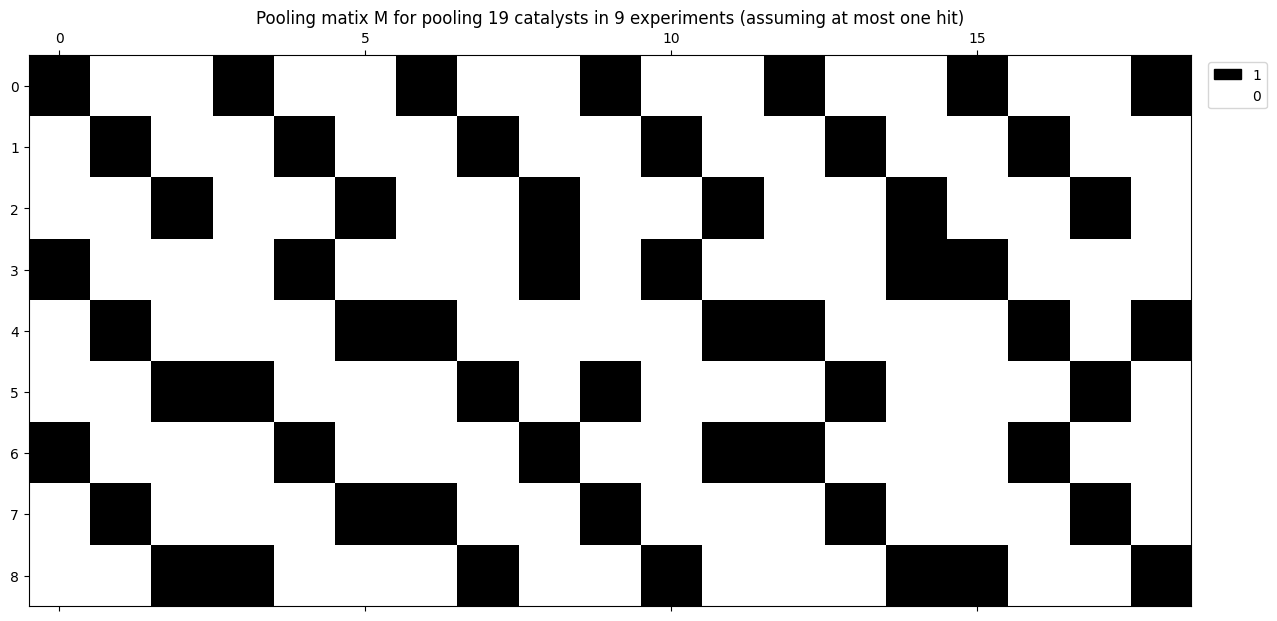

In [ ]:
# Plot the data with a specified size
fig, ax = plt.subplots(figsize=(15, 8))
cax = ax.matshow(M, cmap='gray_r')

# Create a custom legend
import matplotlib.patches as mpatches
black_patch = mpatches.Patch(color='black', label='1')
white_patch = mpatches.Patch(color='white', label='0')

# Place the legend outside the plot
ax.legend(handles=[black_patch, white_patch], loc='upper center', bbox_to_anchor=(1.04, 1))
plt.title(f"Pooling matix M for pooling {M.shape[1]} catalysts in {M.shape[0]} experiments (assuming at most one hit)")
plt.show()

In [ ]:
###### SIMULATION WITH SYNTHETIC DATA ########

#Insert here the hitters (their indexes as a int) and the perc yeald that they
#will prodcue (their numerical value as float in [0,100]) in the following dict
true_hitters = {0:40, 1:90, 2:80, 3:30, }

def generate_y_and_true_x(true_hitters, M):
  """
  Generates simulated experimental results (y) and the corresponding true
  catalyst activity vector (true_x) based on a provided dictionary of
  true hitters and their yields.

  Args:
    true_hitters: A dictionary where keys are catalyst indices (integers) and
                   values are their corresponding yields (floats between 0 and 100).
    M: The pooling matrix (numpy array).

  Returns:
    A tuple containing:
      - y: A numpy array representing the simulated experimental results.
      - true_x: A numpy array representing the true catalyst activity vector,
                where each element corresponds to the yield of a catalyst.
  """
  true_x = np.zeros(M.shape[1])
  for key, value in true_hitters.items():
    true_x[key] = value

  y = M @ true_x
  return y, true_x

y, true_x = generate_y_and_true_x(true_hitters, M)
y_pre  = y

np.set_printoptions(suppress=True)
print("y vector is: ", y, "\n")
print("True x vector to recover is: \n", true_x)
np.set_printoptions(suppress=False)

y vector is:  [ 70.  90.  80.  40.  90. 110.  40.  90. 110.] 

True x vector to recover is: 
 [40. 90. 80. 30.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.]


In [ ]:
import cvxpy as cp

def brute_force_optimization(M, y, verbose=True, epsilon=2.5, NUM_RUNS=10, num_solutions=5):
  n = M.shape[1]
  delta = 1e-8
  W = cp.Parameter(shape=n, nonneg=True)
  x_log = cp.Variable(shape=n)
  obj = cp.Minimize(W.T @ cp.abs(x_log))
  constraints = [cp.norm2(y - M @ x_log) <= epsilon]
  prob = cp.Problem(obj, constraints)
  solutions = []

  for run in range(num_solutions):
      # Random initial weights
      W.value = np.random.rand(n)
      nnzs_log = np.array(())

      for k in range(1, NUM_RUNS + 1):
          prob.solve(solver=cp.CVXOPT)
          if prob.status != cp.OPTIMAL:
              raise Exception("Solver did not converge!")

          nnz = (np.absolute(x_log.value) > delta).sum()
          nnzs_log = np.append(nnzs_log, nnz)
          if verbose:
              print('Solution {}: Iteration {}: Found a feasible x in R^{} with {} nonzeros...'.format(run + 1, k, n, nnz))

          W.value = np.ones(n) / (delta * np.ones(n) + np.absolute(x_log.value))

      new_possible_hits = [i for i in range(len(x_log.value)) if x_log.value[i] >= 0.1]
      yield_of_hitters = x_log.value[new_possible_hits]
      solutions.append((new_possible_hits, yield_of_hitters, prob.value))

      if verbose:
          plt.plot(range(1, 1 + NUM_RUNS), nnzs_log, label=f'Solution {run + 1}')

  if verbose:
      plt.xlabel('iteration', fontsize=16)
      plt.ylabel('number of non-zeros (cardinality)', fontsize=16)
      plt.ylim(0, n)
      plt.xlim(1, NUM_RUNS)
      plt.legend(loc='lower right')
      plt.tight_layout()
      plt.show()

  for idx, (hits, yield_, value) in enumerate(solutions):
      print(f"Solution {idx + 1}:")
      print("Optimal solution", hits)
      print("Optimal yield", yield_)
      print("Optimal value of optimization problem", value)
      print()

  return new_possible_hits, yield_of_hitters

# def brute_force_optimization(M, y, verbose, epsilon = 2.5, NUM_RUNS = 10):

#   ### ITERATIVE LOG HEURISTIC ###
#   n = M.shape[1]
#   # The threshold value below which we consider an element to be zero.
#   delta = 1e-8
#   # Do NUM_RUNS iterations, allocate variable to hold number of non-zeros (cardinality of x) for each run.
#   NUM_RUNS = 10
#   nnzs_log = np.array(())


#   # Store W as a positive parameter for simple modification of the problem.
#   W = cp.Parameter(shape=n, nonneg=True);
#   x_log = cp.Variable(shape=n)

#   # Initial weights.
#   W.value = np.ones(n);

#   # Setup the problem.
#   obj = cp.Minimize( W.T @ cp.abs(x_log) ) # sum of elementwise product
#   constraints = [cp.norm2(y - M @ x_log) <= epsilon]
#   prob = cp.Problem(obj, constraints)

#   # Do the iterations of the problem, solving and updating W.
#   for k in range(1, NUM_RUNS+1):
#     # Solve problem.
#     # The ECOS solver has known numerical issues with this problem
#     # so force a different solver.
#     prob.solve(solver=cp.CVXOPT)

#     # Check for error.
#     if prob.status != cp.OPTIMAL:
#         raise Exception("Solver did not converge!")

#     # Display new number of nonzeros in the solution vector.
#     nnz = (np.absolute(x_log.value) > delta).sum()
#     nnzs_log = np.append(nnzs_log, nnz);
#     if verbose:
#       print('Iteration {}: Found a feasible x in R^{}'
#           ' with {} nonzeros...'.format(k, n, nnz))

#     # Adjust the weights elementwise and re-iterate
#     W.value = np.ones(n)/(delta*np.ones(n) + np.absolute(x_log.value))

#   if verbose:
#     #Plotting this optimization process
#     plt.plot(range(1,1+NUM_RUNS), nnzs_log, label='log heuristic')
#     plt.xlabel('iteration', fontsize=16)
#     plt.ylabel('number of non-zeros (cardinality)', fontsize=16)
#     plt.ylim(0,n)
#     plt.xlim(1,NUM_RUNS)
#     plt.legend(loc='lower right')

#     plt.tight_layout()
#     plt.show()

#   new_possible_hits = [i for i in range(len(x_log.value)) if x_log.value[i] >= 0.1]
#   yield_of_hitters = x_log.value[new_possible_hits]

#   if verbose:
#     print("Optimal solution", new_possible_hits)
#     print("Optimal yield", yield_of_hitters)
#     print("Optimal value of optimization problem", prob.value)
#     print("Status: ", prob.status)

#   ## NB: Here the return tipe for the hitters is a list and not a set
#   return new_possible_hits, yield_of_hitters

Solution 1: Iteration 1: Found a feasible x in R^19 with 17 nonzeros...
Solution 1: Iteration 2: Found a feasible x in R^19 with 6 nonzeros...
Solution 1: Iteration 3: Found a feasible x in R^19 with 6 nonzeros...
Solution 1: Iteration 4: Found a feasible x in R^19 with 6 nonzeros...
Solution 1: Iteration 5: Found a feasible x in R^19 with 6 nonzeros...
Solution 1: Iteration 6: Found a feasible x in R^19 with 6 nonzeros...
Solution 1: Iteration 7: Found a feasible x in R^19 with 6 nonzeros...
Solution 1: Iteration 8: Found a feasible x in R^19 with 6 nonzeros...
Solution 1: Iteration 9: Found a feasible x in R^19 with 6 nonzeros...
Solution 1: Iteration 10: Found a feasible x in R^19 with 6 nonzeros...
Solution 2: Iteration 1: Found a feasible x in R^19 with 19 nonzeros...
Solution 2: Iteration 2: Found a feasible x in R^19 with 7 nonzeros...
Solution 2: Iteration 3: Found a feasible x in R^19 with 7 nonzeros...
Solution 2: Iteration 4: Found a feasible x in R^19 with 7 nonzeros...
Sol

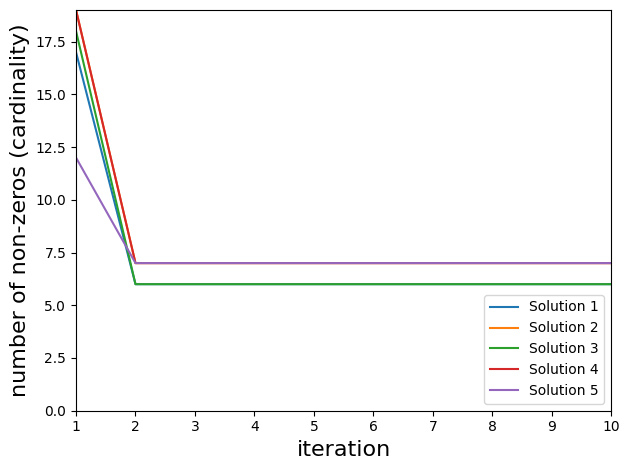

Solution 1:
Optimal solution [11, 13, 14, 18]
Optimal yield [ 59.87197768 109.93327724  40.01528793  69.96944537]
Optimal value of optimization problem 6.000000079755846

Solution 2:
Optimal solution [0, 1, 7, 12, 14, 17]
Optimal yield [14.90541708 34.98259219 55.02170315 55.03038435 54.96227366 54.9726915 ]
Optimal value of optimization problem 7.000000106157257

Solution 3:
Optimal solution [4, 5, 7, 17, 18]
Optimal yield [49.91208206 19.98332494 40.04028245 69.9593851  69.98847696]
Optimal value of optimization problem 6.000000038102283

Solution 4:
Optimal solution [1, 5, 7, 12, 15, 16, 17]
Optimal yield [ 9.95409243 40.09105704 70.08975208 30.05891033 39.94370291  9.90373831
 39.91798015]
Optimal value of optimization problem 7.000000055792404

Solution 5:
Optimal solution [6, 7, 8, 10, 11, 17, 18]
Optimal yield [50.06895708 70.09812025 20.05620689 19.90882477 19.95721129 39.92612366
 19.93849098]
Optimal value of optimization problem 7.000000026158279



([6, 7, 8, 10, 11, 17, 18],
 array([50.06895708, 70.09812025, 20.05620689, 19.90882477, 19.95721129,
        39.92612366, 19.93849098]))

In [ ]:
brute_force_optimization(M, y_pre, verbose=True, epsilon=0.1)

In [ ]:
import cvxpy as cp

#### MAYBE TRY TO ADJUST IT ###

def brute_force_optimization_entropy(M, y, verbose, epsilon = 2.5, NUM_RUNS = 10):

  ### ITERATIVE LOG HEURISTIC ###
  n = M.shape[1]
  # The threshold value below which we consider an element to be zero.
  delta = 1e-8
  # Do NUM_RUNS iterations, allocate variable to hold number of non-zeros (cardinality of x) for each run.
  NUM_RUNS = 10
  nnzs_entr = np.array(())

  # Store W as a positive parameter for simple modification of the problem.
  W = cp.Parameter(shape=n, nonneg=True);
  x_entr = cp.Variable(shape=n)

  # Initial weights.
  W.value = np.ones(n);

  # Setup the problem.
  obj = cp.Minimize( W.T @ (x_entr / cp.sum(x_entr) )) # sum of elementwise product
  constraints = [cp.norm2(y - M @ x_entr) <= epsilon, x_entr >= 0]
  prob = cp.Problem(obj, constraints)

  # Do the iterations of the problem, solving and updating W.
  for k in range(1, NUM_RUNS+1):
    # Solve problem.
    # The ECOS solver has known numerical issues with this problem
    # so force a different solver.
    prob.solve(solver=cp.CVXOPT)

    # Check for error.
    if prob.status != cp.OPTIMAL:
        raise Exception("Solver did not converge!")

    # Display new number of nonzeros in the solution vector.
    nnz = (np.absolute(x_entr.value) > delta).sum()
    nnzs_entr = np.append(nnzs_entr, nnz);
    if verbose:
      print('Iteration {}: Found a feasible x in R^{}'
          ' with {} nonzeros...'.format(k, n, nnz))

    #Adjsut the values of x to make it become a probablity distribution
    x_prob = x_entr.value / np.sum(x_entr.value)
    print("Probabolity distribution at step", k, "is ", x_prob)

    # Adjust the weights elementwise and re-iterate (with the derivative of the entropy)
    W.value =  - 1 * ( cp.entr(x_prob) + np.log(x_prob)) / (1 - x_prob)
    print("Weights at step", k, "are ", W.value)

  if verbose:
    #Plotting this optimization process
    plt.plot(range(1,1+NUM_RUNS), nnzs_entr, label='log heuristic')
    plt.xlabel('iteration', fontsize=16)
    plt.ylabel('number of non-zeros (cardinality)', fontsize=16)
    plt.ylim(0,n)
    plt.xlim(1,NUM_RUNS)
    plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()

  new_possible_hits = [i for i in range(len(x_entr.value)) if x_entr.value[i] >= 0.1]
  yield_of_hitters = x_entr.value[new_possible_hits]

  if verbose:
    print("Optimal solution", new_possible_hits)
    print("Optimal yield", yield_of_hitters)
    print("Optimal value of optimization problem", prob.value)
    print("Status: ", prob.status)

  ## NB: Here the return tipe for the hitters is a list and not a set
  return new_possible_hits, yield_of_hitters

In [ ]:
brute_force_optimization_entropy(M, y_pre, verbose=True, epsilon=0.1)

DCPError: Problem does not follow DCP rules. Specifically:
The objective is not DCP. Its following subexpressions are not:
var2 / Promote(Sum(var2, None, False), (19,))

-----
## Greedy algorithm approach

In [ ]:
from scipy.optimize import lsq_linear

In [ ]:
list_of_candidates = [i for i in range(19)]
list_of_candidates

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [ ]:
greedy_list = []
mincost = np.inf
best_candidate = None
while mincost > 0.1:
  for i in list_of_candidates:

    greedy_list_loop = greedy_list.copy()
    greedy_list_loop.append(i)

    bounds = (0, 100)
    #Solving constrained lest squares
    result = lsq_linear(M[:,greedy_list_loop], y, bounds=bounds)

    cost = result.cost

    if cost < mincost:
      mincost = cost
      best_candidate = i

  greedy_list.append(best_candidate)
  list_of_candidates.remove(best_candidate)



In [ ]:
mincost

1.0097419586828951e-27

In [ ]:
greedy_list

[7, 5, 0, 3, 1]

In [ ]:
result.x

array([87.33333333, 85.33333333, 41.33333333, 22.        ,  4.        ])

In [ ]:
lsq_linear(M[:,[0,1,2,3]], y, bounds=bounds).cost

6.563322731438818e-27

In [ ]:
lsq_linear(M[:,[7, 5, 0, 3, 1]], y, bounds=bounds).cost

1.0097419586828951e-27

-------------

SPGL on big matrix

In [ ]:
!pip install spgl1

In [ ]:
import spgl1

In [ ]:
x, r, g, info = spgl1.spgl1(M, y, tau = 240, sigma=1, verbosity=0, )

In [ ]:
x

array([-2.19248338e-03,  1.67491258e+01,  2.17492072e+01,  1.72713433e+01,
        4.83349895e+00,  1.50824851e+01,  1.06046212e+01,  2.34158479e+01,
        3.16685825e+00,  1.23131263e+01,  1.32703933e+01,  1.16038077e+01,
        7.12594379e+00,  1.84576309e+01,  1.16037526e+01,  7.12588871e+00,
        1.32704484e+01,  1.67909902e+01,  1.55628381e+01])

In [ ]:
[i for i in range(len(x)) if x[i] >= 0.1]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]